In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [30]:
june = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date>=f"{year}-06-01").filter(Measurement.date<=f"{year}-06-30").all()
    june += results
        
june = pd.DataFrame(june, columns=["date", "June Rainfall", "June Temps"])
june["June Temps"].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: June Temps, dtype: float64

## D2: Determine the Summary Statistics for December

In [29]:
december = list()
for year in range(2010, 2018):
    results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date>=f"{year}-12-01").filter(Measurement.date<=f"{year}-12-31").all()
    december += results
        
december = pd.DataFrame(december, columns=["date", "December Rainfall", "December Temps"])
december["December Temps"].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: December Temps, dtype: float64

# Compare the Temperatures for June and December


<AxesSubplot:xlabel='date', ylabel='June Temps'>

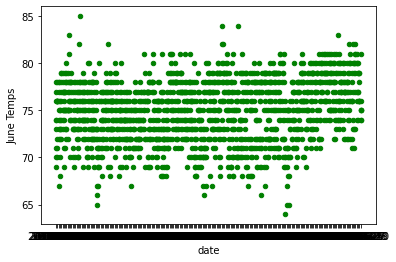

In [23]:
june.plot(x="date", y="June Temps", kind="scatter", color='green')

<AxesSubplot:xlabel='date', ylabel='December Temps'>

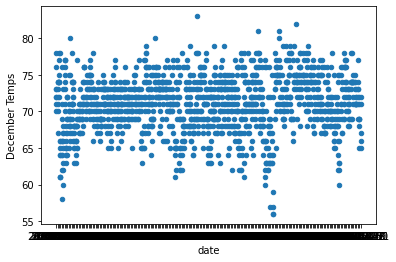

In [22]:
december.plot(x="date", y="December Temps", kind="scatter")

# Compare the Rainfall for June and December


In [42]:
june["June Rainfall"].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: June Rainfall, dtype: float64

In [45]:
december["December Rainfall"].describe()

count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000
Name: December Rainfall, dtype: float64

In [49]:
june[june["June Rainfall"] > 0.03]["June Rainfall"].count()

652

In [50]:
december[december["December Rainfall"]>0.03]["December Rainfall"].count()

649

### Rain Data
- The 25%, 50%, and 75% Data Points are nearly identical in December and June.
- It has rained nearly the same amount aswell {June : 652, December: 649}


<AxesSubplot:xlabel='date', ylabel='June Rainfall'>

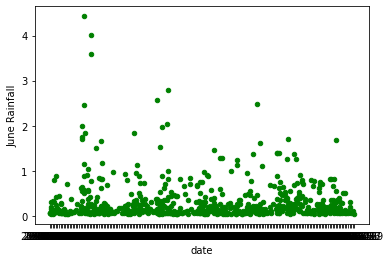

In [51]:
june[june["June Rainfall"]>0.03].plot(x="date", y="June Rainfall", kind="scatter", color='green')

<AxesSubplot:xlabel='date', ylabel='December Rainfall'>

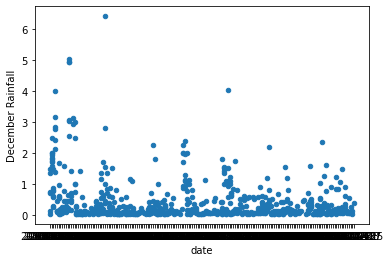

In [52]:
december[december["December Rainfall"]>0.03].plot(x="date", y="December Rainfall", kind="scatter")

## Does the graph change if we zoom into the heavier rain days?

<AxesSubplot:xlabel='date', ylabel='June Rainfall'>

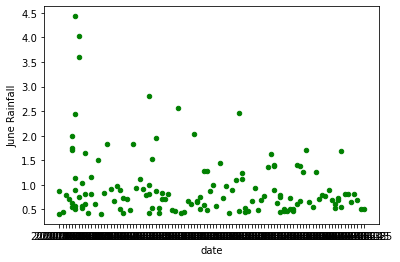

In [72]:
june[june["June Rainfall"]>0.4].plot(x="date", y="June Rainfall", kind="scatter", color="green")

<AxesSubplot:xlabel='date', ylabel='December Rainfall'>

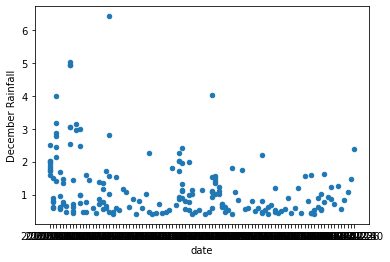

In [73]:
december[december["December Rainfall"]>0.4].plot(x="date", y="December Rainfall", kind="scatter")